## PREDICTION USING SUPERVISED ML
We use a simple linear regression method to find the student percentage by the amount of hours they put in.

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [19]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url)
print(data)
print("Data Imported Succesfully")

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
Data Imported Succesfully


In [3]:
data.info()
data.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#PLOT DATA POINTS ON 2D GRAPHS

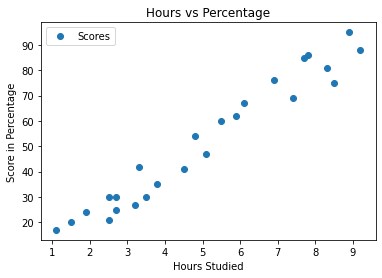

In [6]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Score in Percentage')
plt.show()

From the above graph we can see, "hours studied" is directly proportional to "score in percentage".

In [20]:
X = data.iloc[:, :-1].values
y = data.iloc[:,1].values
print('Hours: ',*X,'\n')
print('Scores: ',y,'\n')

Hours:  [2.5] [5.1] [3.2] [8.5] [3.5] [1.5] [9.2] [5.5] [8.3] [2.7] [7.7] [5.9] [4.5] [3.3] [1.1] [8.9] [2.5] [1.9] [6.1] [7.4] [2.7] [4.8] [3.8] [6.9] [7.8] 

Scores:  [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86] 



**Training and Testing Set**

In [21]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
print("X Train",*X_train,'\n')
print("X test",*X_test,'\n')
print("Y Train",y_train,'\n')
print("Y Test",y_test,'\n')

X Train [3.8] [1.9] [7.8] [6.9] [1.1] [5.1] [7.7] [3.3] [8.3] [9.2] [6.1] [3.5] [2.7] [5.5] [2.7] [8.5] [2.5] [4.8] [8.9] [4.5] 

X test [1.5] [3.2] [7.4] [2.5] [5.9] 

Y Train [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41] 

Y Test [20 27 69 30 62] 



## Traning the algorithm

Here we split the sets into *testing* and *training* sets and we now train the algorithm

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("training is complete")

training is complete


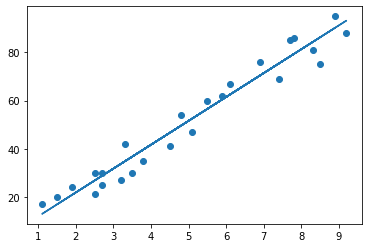

In [13]:
# To plot the regression line
line = regressor.coef_*X+regressor.intercept_

# To plot the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [24]:
print(X_test)
y_pred = regressor.predict(X_test) # Predicting the scores
print(*y_pred,sep=',')

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
16.884144762398023,33.732260779489835,75.35701799818725,26.79480124304026,60.491033277223885


In [16]:
#We now compare the Actual vs Predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## PREDICT THE SCORES

Predicting the scores, if a students studies for 9.25 hrs

In [17]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


## Evaluating Model

Using the metric "mean absolute error" we have evaluated the accuracy of the model.

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
